In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from skimage.exposure import match_histograms


Upload the SOURCE image:


Saving face_det.jpg to face_det (3).jpg
Upload the REFERENCE image:


Saving ins.PNG to ins (2).PNG


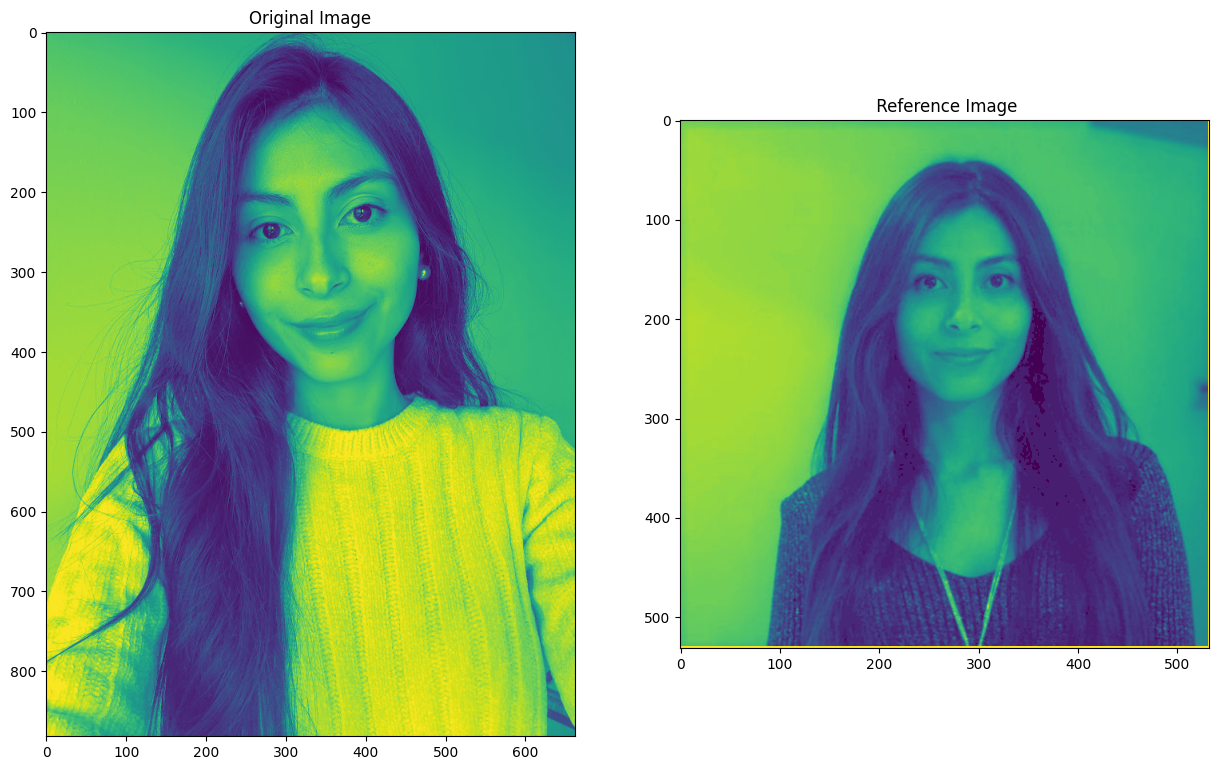

In [9]:
# Step 1: Upload both source and reference images
print("Upload the SOURCE image:")
uploaded = files.upload()
src_file = next(iter(uploaded))
src_array = np.frombuffer(uploaded[src_file], np.uint8)
src_img = cv2.imdecode(src_array, cv2.IMREAD_GRAYSCALE)

print("Upload the REFERENCE image:")
uploaded = files.upload()
ref_file = next(iter(uploaded))
ref_array = np.frombuffer(uploaded[ref_file], np.uint8)
ref_img = cv2.imdecode(ref_array, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize=(15, 10))

# Original image and histogram
plt.subplot(1, 2, 1)
plt.imshow(src_img)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(ref_img)
plt.title(" Reference Image")
plt.show()

In [12]:
# Step 2: Match histogram using skimage (updated for latest version)
matched_img = match_histograms(src_img, ref_img, channel_axis=None)

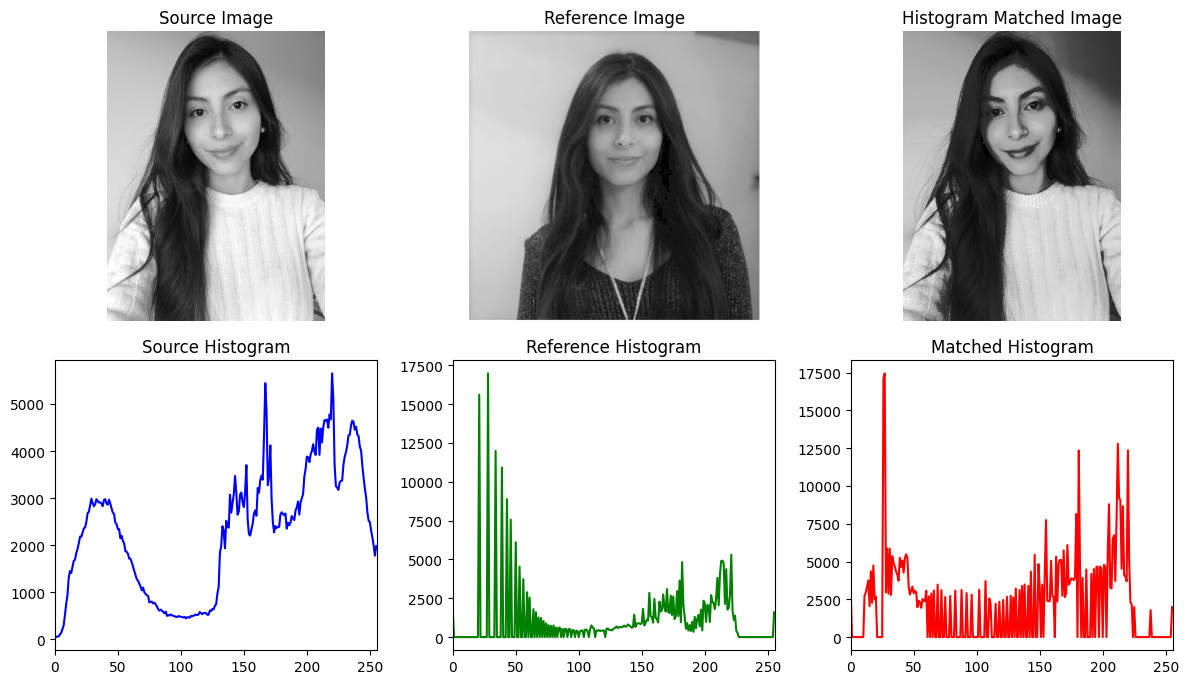

In [13]:
# Step 3: Plot the results
def plot_histogram(img, title, color='black'):
    hist = cv2.calcHist([img.astype(np.uint8)], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title(title)
    plt.xlim([0, 256])

plt.figure(figsize=(12, 10))

# Source image
plt.subplot(3, 3, 1)
plt.imshow(src_img, cmap='gray')
plt.title('Source Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(ref_img, cmap='gray')
plt.title('Reference Image')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(matched_img, cmap='gray')
plt.title('Histogram Matched Image')
plt.axis('off')

# Histograms
plt.subplot(3, 3, 4)
plot_histogram(src_img, "Source Histogram", color='blue')

plt.subplot(3, 3, 5)
plot_histogram(ref_img, "Reference Histogram", color='green')

plt.subplot(3, 3, 6)
plot_histogram(matched_img, "Matched Histogram", color='red')

plt.tight_layout()
plt.show()
